Text(0.5,1,'Temperature Record')

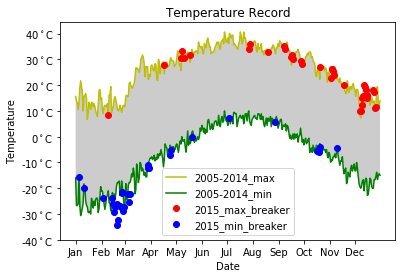

In [155]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
data['Date']=pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['Date']=data['Date'].apply(lambda x:x.strftime('%m-%d'))
data_dacade = data[(data['year']>=2005) & (data['year']<=2014)].sort_values(by=['Date'])
data_2015 = data[data['year']==2015].sort_values(by=['Date'])

data_dacade_max=(data_dacade['Data_Value'].groupby(data_dacade['Date']).max())/10
data_dacade_min=(data_dacade['Data_Value'].groupby(data_dacade['Date']).min())/10
data_dacade_max=data_dacade_max[data_dacade_max.index!='02-29']
data_dacade_min=data_dacade_min[data_dacade_min.index!='02-29']

data_2015_max=(data_2015['Data_Value'].groupby(data_2015['Date']).max())/10
data_2015_min=(data_2015['Data_Value'].groupby(data_2015['Date']).min())/10

data_dacade_month=data_dacade_max.index.map(lambda x:datetime.datetime.strptime(x,'%m-%d')).month

plt.figure()
plt.plot(data_dacade_max.index,data_dacade_max,'y',data_dacade_min.index,data_dacade_min,'g')
plt.gca().fill_between(range(len(data_dacade_max)),data_dacade_min,data_dacade_max,facecolor='k',alpha=0.2)
data_2015_max_higher=data_2015_max[data_2015_max>data_dacade_max]
plt.plot(data_2015_max_higher.index,data_2015_max_higher,'ro')
data_2015_min_lower=data_2015_min[data_2015_min<data_dacade_min]
plt.plot(data_2015_min_lower.index,data_2015_min_lower,'bo')

plt.xticks(['01-01','02-01','03-01','04-01','05-01','06-01','07-01' \
            ,'08-01','09-01','10-01','11-01','12-01'],['Jan','Feb','Mar' \
                                                       ,'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['2005-2014_max','2005-2014_min','2015_max_breaker','2015_min_breaker'])

plt.gca().set_yticks(range(-40,50,10))
plt.gca().set_yticklabels(str(i)+'$^\circ$C'for i in range(-40,50,10))

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Record')